In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from functions.match_functions import *
from functions.preprocess_functions import *
import seaborn as sns

[16:09:56] WARNING: not removing hydrogen atom without neighbors
[16:09:56] WARNING: not removing hydrogen atom without neighbors
[16:09:56] WARNING: not removing hydrogen atom without neighbors


In [4]:
test=pd.read_csv("unprocessed_data/all_wells_20250411.csv",index_col=0)
values_df=pd.read_csv("first_plate/first_plate_targets.csv", sep=";")
test.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY',
      'CHARGE', 'RT', 'peaks', 'Well']
len(test)/len(test["Well"].unique())
#len(test["Well"].unique())
test

/tmp/ipykernel_47446/4193866214.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  values_df=pd.read_csv("first_plate/first_plate_targets.csv", sep=";")


,CCS,Precursor_type,PrecursorMZ,POLARITY,CHARGE,RT,peaks,Well
0,124.171295,[M+H]+,136.061711,Pos,+,4.637133,"{'mz': [61.01280583371198, 65.23473240305354, ...",A10
1,145.152512,[M+H]+,202.179960,Pos,+,10.133312,"{'mz': [62.059756823333565, 84.08136805823057,...",A10
2,233.117508,[M+H+H]2+,139.013036,Pos,2+,10.827045,"{'mz': [105.50619815568453, 108.66883452540216...",A10
3,139.079559,[M+H]+,217.014323,Pos,+,11.148840,"{'mz': [60.98732931781918, 61.0102815668719, 6...",A10
4,171.973175,[M+H]+,372.970212,Pos,+,11.468700,"{'mz': [79.02245327374462, 136.9709713703652, ...",A10
...,...,...,...,...,...,...,...,...
718,246.280075,[M+H]+,552.484355,Pos,+,291.391418,"{'mz': [56.593172715075696, 57.96481976770686,...",P09
719,127.036064,[M+H]+,176.975790,Pos,+,297.084778,"{'mz': [57.934495233316554, 138.93616861403277...",P09
720,144.092514,[M+H]+,225.010404,Pos,+,296.678467,"{'mz': [79.0229018888081, 87.98329855437615, 1...",P09
721,154.433304,[M+H]+,254.925795,Pos,+,300.553375,"{'mz': [176.9091901553379], 'intensity': [94.5...",P09


In [6]:
match,not_found, data_out=match_one_well(test,'A24',10,values_df)

----- Targeting A24
Converting m/z to m for matching
Found 69 / 91 matches at 10 ppm


In [7]:
data_out.dropna()#["Precursor_type"].unique()
#data_out[data_out["Precursor_type"]=="[M+H]+"].sort_values(by="M", ascending=False)

,CCS,Precursor_type,PrecursorMZ,POLARITY,CHARGE,RT,peaks,Well,M,Target,SMILES,INCHIKEY,Name
31,175.847626,[M+H]+,310.118107,Pos,+,56.882652,"{'mz': [52.2787229853079, 56.754791152749675, ...",A24,309.110807,309.111341,OC(=O)[C@@H](Cc1nc2ccccc2[nH]1)NC(=O)c3ccccc3,PKPUTDYYXVWOQR-CQSZACIVSA-N,AZ13995349-001
52,167.356094,[M+H]+,267.185525,Pos,+,83.602089,"{'mz': [152.0632101001559, 165.0694410562462, ...",A24,266.178225,266.178299,CN(C)C1CN(C1)C(c2ccccc2)c3ccccc3,QWCKPGXZMZCXJD-UHFFFAOYSA-N,AZ12259642-010
84,152.514862,[M+H]+,250.010429,Pos,+,113.407707,"{'mz': [68.01365756085202, 74.00584643654892, ...",A24,249.003129,249.003053,CSC1=NC(=C(C#N)C(=O)N1)c2cccs2,VDPMRMLCAJPWSP-UHFFFAOYSA-N,AZ10289454-001
147,170.542862,[M+H]+,334.007116,Pos,+,166.592957,"{'mz': [57.61232564699061, 58.70744123198532, ...",A24,332.999816,333.000056,Cc1cc(NC(=O)c2ccc3OCOc3c2)ccc1Br,SVTREZXQRMOGCF-UHFFFAOYSA-N,AZ14372152-001
262,168.155838,[M+H]+,297.131984,Pos,+,25.634243,"{'mz': [53.34380780644253, 70.04077364949231, ...",A24,296.124684,296.124640,Nc1ncnc(Nc2cccc(Nc3ncnc(N)n3)c2)n1,GEWMKUHOKVGJEQ-UHFFFAOYSA-N,AZ10592130-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,216.539139,[M+H]+,517.162406,Pos,+,186.535248,"{'mz': [91.05210400388353, 95.08485946249841, ...",A24,516.155106,516.154879,CCC(=O)O[C@@]1([C@H](C)C[C@H]2[C@@H]3C[C@H](F)...,MVLBCBPGBUAVJQ-CENSZEJFSA-N,AZ10960383-001
486,203.911865,[M+H]+,377.185651,Pos,+,191.365265,"{'mz': [54.67605999484143, 56.797653033999396,...",A24,376.178351,376.178693,CCCCC(=O)Nc1ccc(cc1)c2onc3c2CCc4cc(OC)ccc34,GCFYUKDHEPQHIG-UHFFFAOYSA-N,AZ12372219-001
488,156.884811,[M+H]+,257.091404,Pos,+,193.703995,"{'mz': [65.02161843116966, 68.04886946471592, ...",A24,256.084104,256.084576,CC1(CC1)c2ccnc(SCCC=C(F)F)n2,RABTYXXNLCLMSE-UHFFFAOYSA-N,AZ14001929-001
495,212.411316,[M+H]+,412.247852,Pos,+,202.447514,"{'mz': [53.461537105216095, 53.5914513795876, ...",A24,411.240552,411.240958,CCCCC(=O)N1CCc2cc(OC)c(OC)cc2[C@@H]1COc3ccc(CC...,UKWSDRVJFHLVBE-QFIPXVFZSA-N,AZ12070965-001


In [4]:
def plot_match_and_error(msms, well,ppm, values_df):
    fig,ax=plt.subplots(1,2,figsize=(12, 5))
    
    match,not_found,i_match,i_not_found,data_out=match_one_well(msms,well,ppm,values_df,True)
    x_multi = [n for n in [i_match, i_not_found, match, not_found]]
    
    ax[0].hist(x_multi, 20, histtype='bar',label=["Internal standard found","Internal standard missing","Target found","Target missing"])
    ax[0].legend()
    ax[0].set_title( str(len(match)) +" matches")
    ax[0].set_xlabel("Target M")
    
    data=data_out.dropna(subset="Target")
    ax[1].scatter(data["Target"],data["M"]-data["Target"])
    ax[1].set_ylabel("Diff in Da")
    ax[1].set_xlabel("Target M")
    ax[1].set_title("Diff at "+str(ppm)+"ppm")
    ax[1].axhline(y=0, color='r', linestyle='-')

In [5]:
match_all=[]
ppm=5
not_found_all=[]
i_match_all=[]
i_not_found_all=[]
for well in test["Well"].unique():
    match,not_found,i_match,i_not_found,data_out=match_one_well(test,well,ppm,values_df,int_s=True)
    for m in match:
        match_all.append(m)
    for n in not_found:
        not_found_all.append(n)
    for im in i_match:
        i_match_all.append(im)
    for i in i_not_found:
        i_not_found_all.append(i)


----- Targeting A10
Converting m/z to m for matching
Found 71 / 96 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A11
Converting m/z to m for matching
Found 69 / 98 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 1 / 4 matches at 5 ppm
----- Targeting A12
Converting m/z to m for matching
Found 70 / 92 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A13
Converting m/z to m for matching
Found 68 / 94 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting A14
Converting m/z to m for matching
Found 70 / 94 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 3 / 4 matches at 5 ppm
----- Targeting A15
Converting m/z to m for matching
Found 67 / 95 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 2 / 4 matches at 5 ppm
----- Targeting 

(50.0, 800.0)

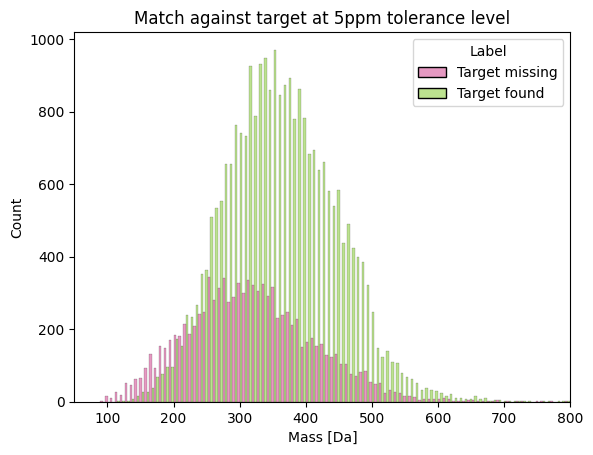

In [18]:
t=pd.DataFrame(match_all)
t["label"]="Target found"
n=pd.DataFrame(not_found_all)
n["label"]="Target missing"

s=pd.concat([n,t])
s.columns=["Mass [Da]","Label"]
fig=sns.histplot(data=s, x="Mass [Da]",hue="Label",multiple="dodge",palette=["#de77ae","#a6d96a"])
fig.set_title("Match against target at 5ppm tolerance level")
fig.set_xlim(50,800)

<Axes: xlabel='Mass', ylabel='Count'>

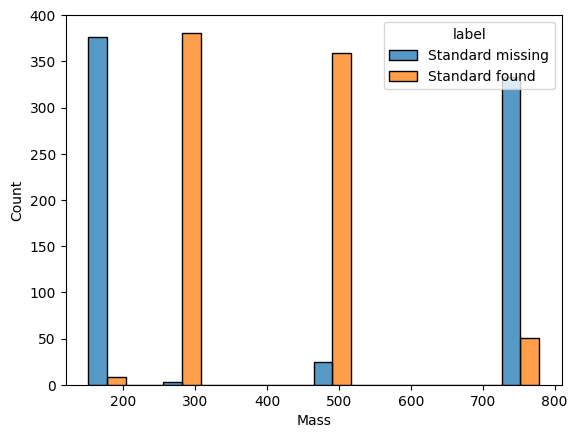

In [45]:
t=pd.DataFrame(i_match_all)
t["label"]="Standard found"
n=pd.DataFrame(i_not_found_all)
n["label"]="Standard missing"

s=pd.concat([n,t])
s.columns=["Mass","label"]
sns.histplot(data=s, x="Mass",hue="label",multiple="dodge",title="Hej")#,bins=20)


In [4]:
match_all=[]
ppm=5
not_found_all=[]
i_match_all=[]
i_not_found_all=[]
for well in test["Well"].unique():
    match,not_found,i_match,i_not_found,data_out=match_one_well(test,well,ppm,values_df,int_s=True,return_nearest=True)
    for m in match:
        match_all.append(m)
    for n in not_found:
        not_found_all.append(n)
    for im in i_match:
        i_match_all.append(im)
    for i in i_not_found:
        i_not_found_all.append(i)


----- Targeting A10
Converting m/z to m for matching
Found 96 / 96 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 4 / 4 matches at 5 ppm
----- Targeting A11
Converting m/z to m for matching
Found 98 / 98 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 4 / 4 matches at 5 ppm
----- Targeting A12
Converting m/z to m for matching
Found 92 / 92 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 4 / 4 matches at 5 ppm
----- Targeting A13
Converting m/z to m for matching
Found 94 / 94 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 4 / 4 matches at 5 ppm
----- Targeting A14
Converting m/z to m for matching
Found 94 / 94 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 4 / 4 matches at 5 ppm
----- Targeting A15
Converting m/z to m for matching
Found 95 / 95 matches at 5 ppm
Internal Standard
Converting m/z to m for matching
Found 4 / 4 matches at 5 ppm
----- Targeting 

In [9]:
msms=pd.read_csv("new_run/A01-C24_50/A01-C24.msmsonly.csv")
msms=process_col_names(msms,2000)

#### Special as 3 A01 (blanks) were present"
cols=list(range(1,74))
cols.remove(12)
cols.remove(13)
msms=msms.iloc[:,cols]
############
msms=add_id(msms)


Number of mz found in just one sample:  10119


----- Targeting A14
Converting m/z to m for matching
Found 71 / 94 matches at 10 ppm
Internal Standard
Converting m/z to m for matching
Found 3 / 4 matches at 10 ppm


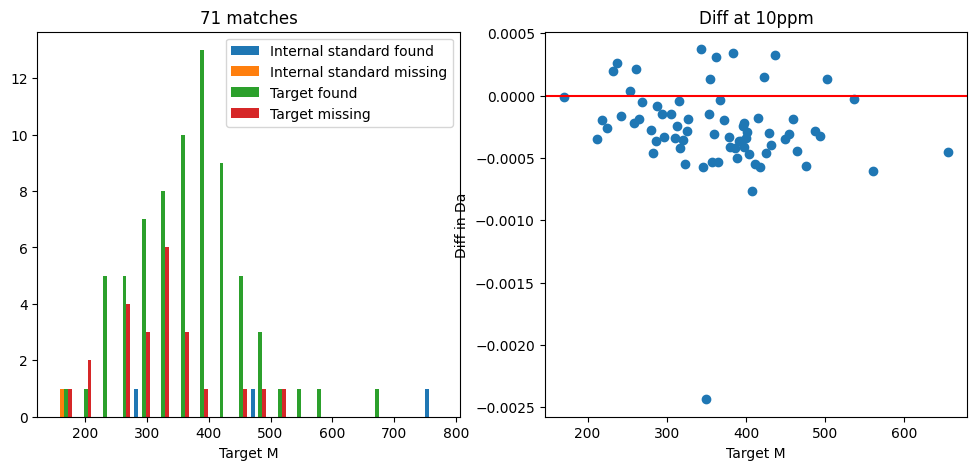

In [7]:
well="A14"
ppm=10
#plot_match_and_error(msms,well,ppm, values_df)
plot_match_and_error(test,well,ppm,values_df)

In [11]:
data_combined=pd.DataFrame(columns=test.columns)
t=0
ppm=2
for well in test["Well"].unique():
        
        data_out=match_one_well(test,well,ppm,values_df)[-1]
        t=t+len(values_df[values_df["Position"]==well])
        data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target")#.iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")
data_filtered.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY', 'CHARGE', 'RT',
       'peaks', 'Well', 'M', 'Target', 'SMILES', 'InChIKey', 'Name']

#data_filtered.to_csv("plate20250408_matched_"+str(ppm)+"ppm.csv")

----- Targeting A10
Converting m/z to m for matching
Found 69 / 96 matches at 2 ppm
----- Targeting A11


/tmp/ipykernel_3199/4192888016.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Converting m/z to m for matching
Found 68 / 98 matches at 2 ppm
----- Targeting A12
Converting m/z to m for matching
Found 68 / 92 matches at 2 ppm
----- Targeting A13
Converting m/z to m for matching
Found 67 / 94 matches at 2 ppm
----- Targeting A14
Converting m/z to m for matching
Found 69 / 94 matches at 2 ppm
----- Targeting A15
Converting m/z to m for matching
Found 66 / 95 matches at 2 ppm
----- Targeting A16
Converting m/z to m for matching
Found 59 / 95 matches at 2 ppm
----- Targeting A17
Converting m/z to m for matching
Found 64 / 94 matches at 2 ppm
----- Targeting A18
Converting m/z to m for matching
Found 58 / 91 matches at 2 ppm
----- Targeting A19
Converting m/z to m for matching
Found 70 / 98 matches at 2 ppm
----- Targeting A01
Converting m/z to m for matching
Found 72 / 96 matches at 2 ppm
----- Targeting A20
Converting m/z to m for matching
Found 66 / 89 matches at 2 ppm
----- Targeting A21
Converting m/z to m for matching
Found 63 / 93 matches at 2 ppm
----- Target

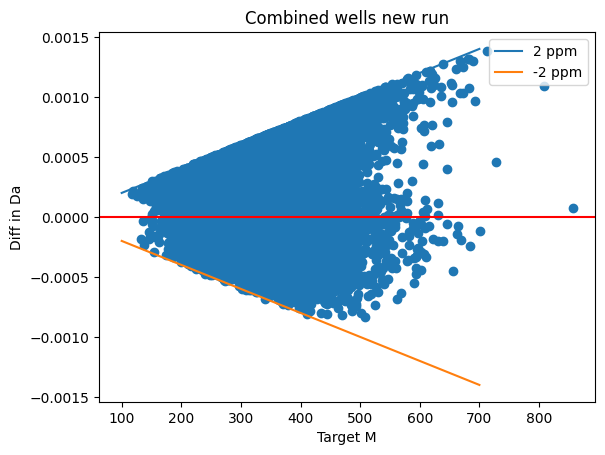

In [12]:

data_combined=pd.DataFrame(columns=test.columns)
t=0
ppm=5
for well in test["Well"].unique():
        
        data_out=match_one_well(test,well,ppm,values_df,return_nearest=True)[-1]
        t=t+len(values_df[values_df["Position"]==well])
        data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target")#.iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")
data_filtered.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY', 'CHARGE', 'RT',
       'peaks', 'Well', 'M', 'Target', 'SMILES', 'InChIKey', 'Name']

In [7]:
data_combined=pd.DataFrame(columns=test.columns)
t=0
ppm=5
for well in test["Well"].unique():
        
        data_out=match_one_well(test,well,ppm,values_df,return_nearest=True)[-1]
        t=t+len(values_df[values_df["Position"]==well])
        data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target")#.iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")
data_filtered.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY', 'CHARGE', 'RT',
       'peaks', 'Well', 'M', 'Target', 'SMILES', 'InChIKey', 'Name']

----- Targeting A10
Converting m/z to m for matching
Found 96 / 96 matches at 5 ppm
----- Targeting A11
Converting m/z to m for matching


/tmp/ipykernel_32165/1104539729.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 98 / 98 matches at 5 ppm
----- Targeting A12
Converting m/z to m for matching
Found 92 / 92 matches at 5 ppm
----- Targeting A13
Converting m/z to m for matching
Found 94 / 94 matches at 5 ppm
----- Targeting A14
Converting m/z to m for matching
Found 94 / 94 matches at 5 ppm
----- Targeting A15
Converting m/z to m for matching
Found 95 / 95 matches at 5 ppm
----- Targeting A16
Converting m/z to m for matching
Found 95 / 95 matches at 5 ppm
----- Targeting A17
Converting m/z to m for matching
Found 94 / 94 matches at 5 ppm
----- Targeting A18
Converting m/z to m for matching
Found 91 / 91 matches at 5 ppm
----- Targeting A19
Converting m/z to m for matching
Found 98 / 98 matches at 5 ppm
----- Targeting A01
Converting m/z to m for matching
Found 96 / 96 matches at 5 ppm
----- Targeting A20
Converting m/z to m for matching
Found 89 / 89 matches at 5 ppm
----- Targeting A21
Converting m/z to m for matching
Found 93 / 93 matches at 5 ppm
----- Targeting A22
Converting m/z to m for m

36158

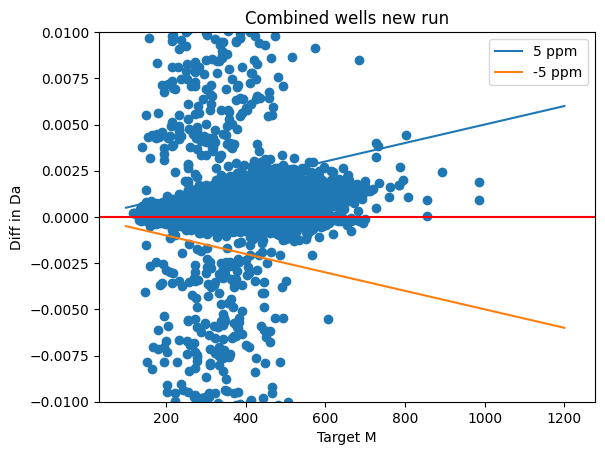

In [15]:
data=data_filtered
x=np.linspace(100,1200)
y=x*ppm*10**-6
plt.scatter(data["Target"],data["M"]-data["Target"])
plt.ylabel("Diff in Da")
plt.xlabel("Target M")
plt.ylim(-0.01,0.01)
plt.title("Combined wells new run")
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(x,y,label=str(ppm)+" ppm")
plt.plot(x,-y,label="-"+str(ppm)+" ppm")
plt.legend()
len(data)

In [13]:
# To compare with old

data_combined=pd.DataFrame(columns=msms.columns)
t=0
for well in msms["Well"].unique():
        
        data_out=match_one_well(msms,well,ppm,values_df)[-1]
        t=t+len(values_df[values_df["Position"]==well])
        data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target").iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")

----- Targeting B21
Found 25 / 95 matches at 2 ppm
----- Targeting A24
Found 39 / 91 matches at 2 ppm
----- Targeting B11
Found 44 / 94 matches at 2 ppm
----- Targeting B12
Found 33 / 97 matches at 2 ppm
----- Targeting B03
Found 1 / 89 matches at 2 ppm
----- Targeting B10
Found 3 / 92 matches at 2 ppm
----- Targeting B18


/tmp/ipykernel_3199/3768840696.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 1 / 98 matches at 2 ppm
----- Targeting A09
Found 2 / 90 matches at 2 ppm
----- Targeting A16
Found 2 / 95 matches at 2 ppm
----- Targeting C08
Found 3 / 90 matches at 2 ppm
----- Targeting B02
Found 6 / 98 matches at 2 ppm
----- Targeting C10
Found 32 / 92 matches at 2 ppm
----- Targeting B16
Found 5 / 95 matches at 2 ppm
----- Targeting B22
Found 1 / 92 matches at 2 ppm
----- Targeting A05
Found 33 / 96 matches at 2 ppm
----- Targeting A14
Found 31 / 94 matches at 2 ppm
----- Targeting B20
Found 7 / 96 matches at 2 ppm
----- Targeting B08
Found 36 / 94 matches at 2 ppm
----- Targeting C03
Found 25 / 89 matches at 2 ppm
----- Targeting A23
Found 34 / 93 matches at 2 ppm
----- Targeting A19
Found 33 / 98 matches at 2 ppm
----- Targeting B01
Found 6 / 93 matches at 2 ppm
----- Targeting C02
Found 1 / 93 matches at 2 ppm
----- Targeting A02
Found 24 / 97 matches at 2 ppm
----- Targeting A03
Found 16 / 92 matches at 2 ppm
----- Targeting C11
Found 0 / 93 matches at 2 ppm
----- Targe

In [ ]:
!python filter_data.py -i "plate20250408_matched_5ppm.csv" -o "plate20250408_5ppm_preprocessed_rounded_3dec.csv"

In [88]:
!python ../../'MS models'/fiora/notebooks/train_model.py -i ../../'MS models'/fiora/notebooks/plate20250408_and_mona.csv -l 0.001 -e 50 -t "RGCNConv_1" #-m ../../checkpoint_Mona_only.best.pt

[16:42:30] WARNING: not removing hydrogen atom without neighbors
[16:42:30] WARNING: not removing hydrogen atom without neighbors
[16:42:30] WARNING: not removing hydrogen atom without neighbors
Working with Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
Filtering based on CE and weight
    > Found 16540 unique molecular structures.
Filtering spectra (25760) down to 25382
Filtering low peak counts
Removed  4223 due to less than 2 peaks
Split into training, testing and validation
Running on device: cuda:0
Training model
dataset
test           1618
train         12944
validation     1618
Name: group_id, dtype: int64
Prepared training/validation with 19021 data points
Using pre-arranged train/validation set
/home/michaelah/miniconda3/envs/fiora/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: FutureWarning: The default value for `maximize` will be changed from `True` to `None` in v1.7.0 of TorchMetrics,will automatically infer the val

0.750456179749394
0.7542517117684393 bs 128 lr 0.0001
0.7559011867811001  bs 128 lr 0.0005
0.7616149379251894 bs 128 lr 0.0005 input_dropout 0.3
0.7628975670966699 bs 128 lr 0.001 input_dropout 0.3 lr_factor 0.1
--> 0.7643257263094405 bs 128 lr 0.001 input_dropout 0.2 lr_factor 0.1

# TODO: SEE IF Better can be gotten with both mona and timstof. Increase max numberof peaks? 
# Or just get the best model into Docker (0.764)
w/o pre-training
GraphConv: 0.7503951409377686
GAT:0.7433858721449005
RGCNConv: 0.7664068142302216 ? Cant get this again-....
TransformerConv: 0.5289656778617334
CGConv:0.2487336596330053


In [ ]:
# PRETTY GOOD! Best yet --> 0.737  
!python ../../'MS models'/fiora/notebooks/train_model_test.py -i plate20250408_5ppm_preprocessed_rounded.csv -l 0.0001 -e 100 -t "all_wells_mona_ft_rounded" -m ../../checkpoint_Mona_only.best.pt  

!python ../../'MS models'/fiora/notebooks/train_model_test.py -i plate20250408_5ppm_preprocessed_rounded_by_procent.csv -l 0.0001 -e 50 -t "all_wells_mona_ft_rounded" -m ../../checkpoint_Mona_only.best.pt
#Median  spectral_sqrt_cosine for the test set is 0.7543561013941257  'epoch': 48 ( maybe can train longer)
